In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv("./assignment2-data.csv")
df.head()

,Type,Travel,Government,Tech,Consumer,Nonprofit,Financial,Healthcare,Energy,Education
0,Target,$5.11,$4.54,$3.04,$1.83,$1.84,$1.21,$1.22,$1.23,$1.22
1,Actual,$3.30,$1.82,$4.22,$0.62,$0.30,$0.99,$2.14,$1.35,$0.64


In [3]:
for column in df.columns[1:]:
    df[column] = df[column].str.replace('$', '', regex=False).str.strip()
    df[column]= df[column].astype(float)
df.head()

,Type,Travel,Government,Tech,Consumer,Nonprofit,Financial,Healthcare,Energy,Education
0,Target,5.11,4.54,3.04,1.83,1.84,1.21,1.22,1.23,1.22
1,Actual,3.30,1.82,4.22,0.62,0.30,0.99,2.14,1.35,0.64


In [4]:
diff = (df.iloc[1,1:]-df.iloc[0,1:])
df_sort = df.loc[:, diff.sort_values().index]
df_sort.insert(0,'Type', ['Target', 'Actual'])
df_sort.head()

,Type,Government,Travel,Nonprofit,Consumer,Education,Financial,Energy,Healthcare,Tech
0,Target,4.54,5.11,1.84,1.83,1.22,1.21,1.23,1.22,3.04
1,Actual,1.82,3.30,0.30,0.62,0.64,0.99,1.35,2.14,4.22


In [5]:
df_sort.iloc[0,:][1:]

Government    4.54
Travel        5.11
Nonprofit     1.84
Consumer      1.83
Education     1.22
Financial     1.21
Energy        1.23
Healthcare    1.22
Tech          3.04
Name: 0, dtype: object

In [6]:
sum(df.iloc[1,1:])

np.float64(15.38)

C:\Users\pitom\AppData\Local\Temp\ipykernel_29844\4135688495.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(y_lab)


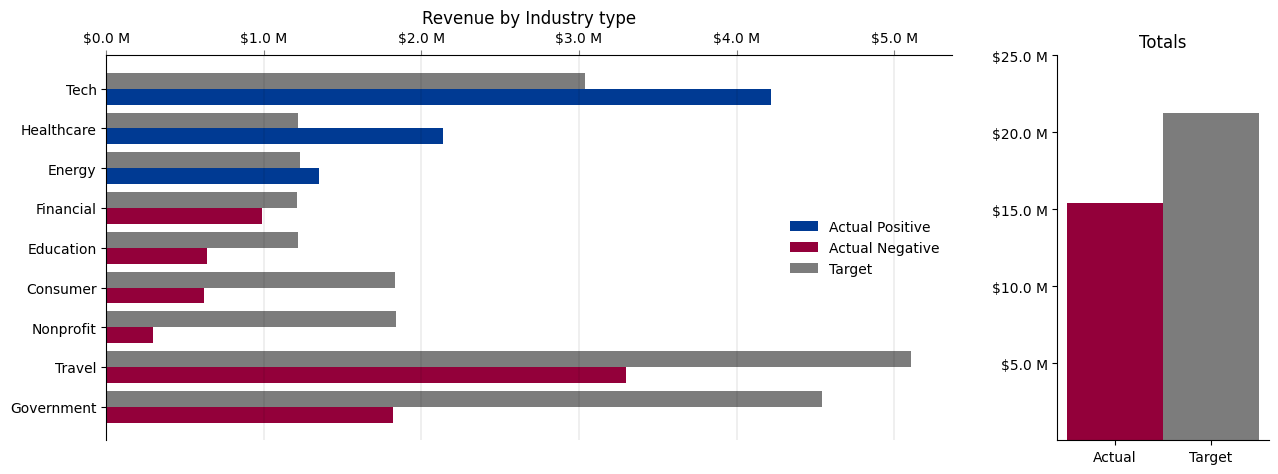

In [7]:
x = np.arange(len(df_sort.columns[1:]))  # Posizione sulle ascisse
width = 0.4 
y_lab = ['$0.0 M','$1.0 M','$2.0 M','$3.0 M','$4.0 M', '$5.0 M']
##00125f, #7c7c7c, #640018

fig,ax = plt.subplots(1,2,figsize=(15,5), gridspec_kw={'width_ratios': [4, 1]})
ax[0].barh(x[-3:]-width/2, df_sort.iloc[1,-3:], width, label='Actual Positive',color='#003a93')
ax[0].barh(x[:-3]-width/2, df_sort.iloc[1,1:-3], width, label='Actual Negative', color='#93003a')
ax[0].barh(x+width/2, df_sort.iloc[0,1:], width,label = df_sort.Type[0], color='#7c7c7c')
ax[0].set_yticks(x)
ax[0].set_yticklabels(df_sort.columns[1:])
ax[0].set_xticklabels(y_lab)
ax[0].tick_params(axis='x', color = 'grey')
ax[0].set_title('Revenue by Industry type')
ax[0].spines['bottom'].set_visible(False) 
ax[0].spines['right'].set_visible(False)
ax[0].xaxis.set_ticks_position('top')  
ax[0].xaxis.set_label_position('top')  
ax[0].grid(True, which='both', axis='x', color='black', linestyle='-', linewidth=0.3, alpha=0.3)
ax[0].legend(loc = 'center right', frameon=False)

ax[1].bar(1-width/2,sum(df_sort.iloc[1,1:]),width, color='#93003a')
ax[1].bar(1+width/2,sum(df_sort.iloc[0,1:]),width, color='#7c7c7c')
ax[1].set_xticks([1-width/2,1+width/2])
ax[1].set_xticklabels(['Actual','Target'])
ax[1].set_yticks([5,10,15,20,25])
ax[1].set_yticklabels(['$5.0 M','$10.0 M','$15.0 M','$20.0 M','$25.0 M'])
ax[1].set_title('Totals')
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)   


plt.show()

C:\Users\pitom\AppData\Local\Temp\ipykernel_29844\1325344341.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_yticklabels(y_lab)
C:\Users\pitom\AppData\Local\Temp\ipykernel_29844\1325344341.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_yticklabels(y_lab)


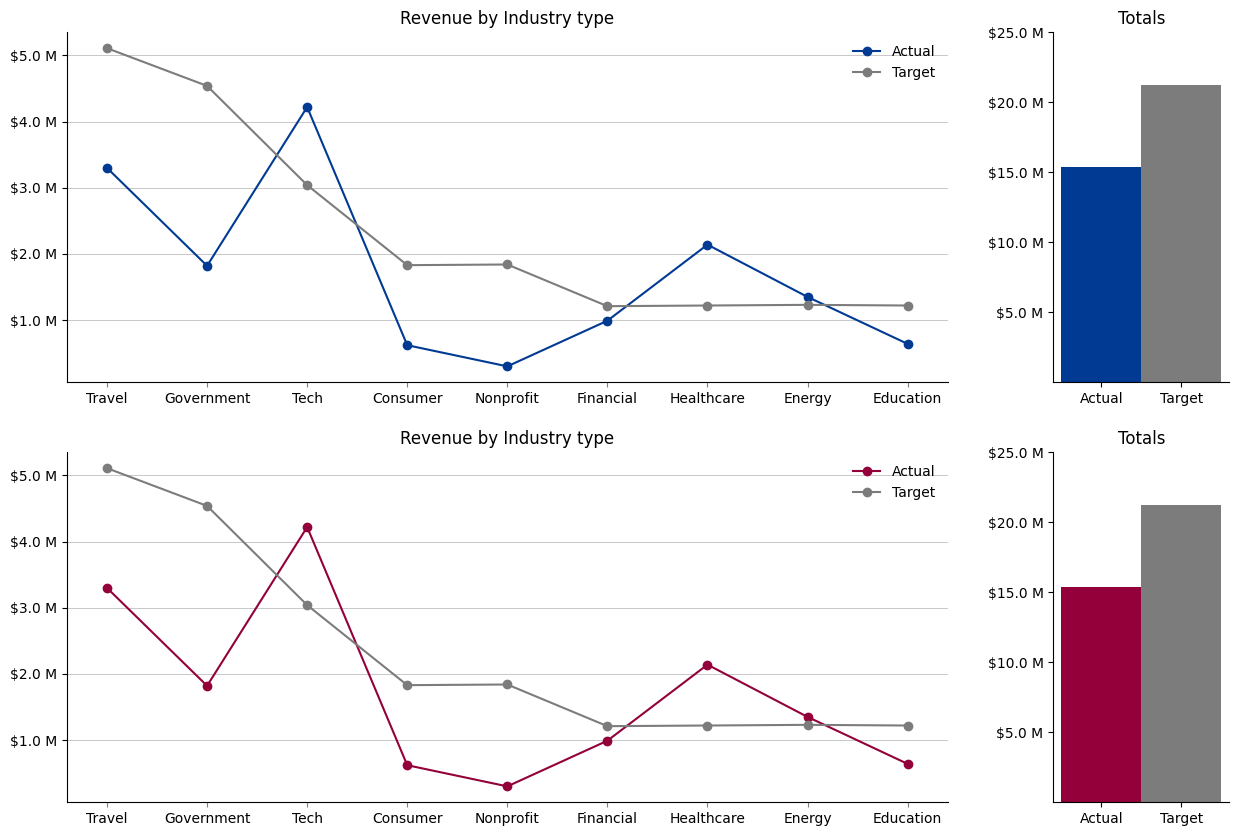

In [8]:
#003a93, #7c7c7c, #93003a

x = np.arange(len(df_sort.columns[1:]))  # Posizione sulle ascisse
width = 0.4 
fig,ax = plt.subplots(2,2,figsize=(15,10), gridspec_kw={'width_ratios': [5, 1]})
ax[0,0].plot(x, df.iloc[1,1:], label = df.Type[1], marker='o', color='#003a93')
ax[0,0].plot(x, df.iloc[0,1:],label = df.Type[0], marker='o', color='#7c7c7c')
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(df.columns[1:])
ax[0,0].set_yticklabels(y_lab)
ax[0,0].tick_params(axis='x', color = 'grey')
ax[0,0].set_title('Revenue by Industry type')
ax[0,0].spines['top'].set_visible(False) 
ax[0,0].spines['right'].set_visible(False)
ax[0,0].grid(True, which='both', axis='y', color='black', linestyle='-', linewidth=0.5, alpha=0.3)
ax[0,0].legend(frameon = False)

ax[0,1].bar(1-width/2,sum(df_sort.iloc[1,1:]),width, color='#003a93')
ax[0,1].bar(1+width/2,sum(df_sort.iloc[0,1:]),width, color='#7c7c7c')
ax[0,1].set_xticks([1-width/2,1+width/2])
ax[0,1].set_xticklabels(['Actual','Target'])
ax[0,1].set_yticks([5,10,15,20,25])
ax[0,1].set_yticklabels(['$5.0 M','$10.0 M','$15.0 M','$20.0 M','$25.0 M'])
ax[0,1].set_title('Totals')
ax[0,1].spines['top'].set_visible(False) 
ax[0,1].spines['right'].set_visible(False)  

ax[1,0].plot(x, df.iloc[1,1:], label = df.Type[1], marker='o', color='#93003a')
ax[1,0].plot(x, df.iloc[0,1:],label = df.Type[0], marker='o', color='#7c7c7c')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(df.columns[1:])
ax[1,0].set_yticklabels(y_lab)
ax[1,0].tick_params(axis='x', color = 'grey')
ax[1,0].set_title('Revenue by Industry type')
ax[1,0].spines['top'].set_visible(False) 
ax[1,0].spines['right'].set_visible(False)
ax[1,0].grid(True, which='both', axis='y', color='black', linestyle='-', linewidth=0.5, alpha=0.3)
ax[1,0].legend(frameon = False)

ax[1,1].bar(1-width/2,sum(df_sort.iloc[1,1:]),width, color='#93003a')
ax[1,1].bar(1+width/2,sum(df_sort.iloc[0,1:]),width, color='#7c7c7c')
ax[1,1].set_xticks([1-width/2,1+width/2])
ax[1,1].set_xticklabels(['Actual','Target'])
ax[1,1].set_yticks([5,10,15,20,25])
ax[1,1].set_yticklabels(['$5.0 M','$10.0 M','$15.0 M','$20.0 M','$25.0 M'])
ax[1,1].set_title('Totals')
ax[1,1].spines['top'].set_visible(False) 
ax[1,1].spines['right'].set_visible(False)  

plt.show()

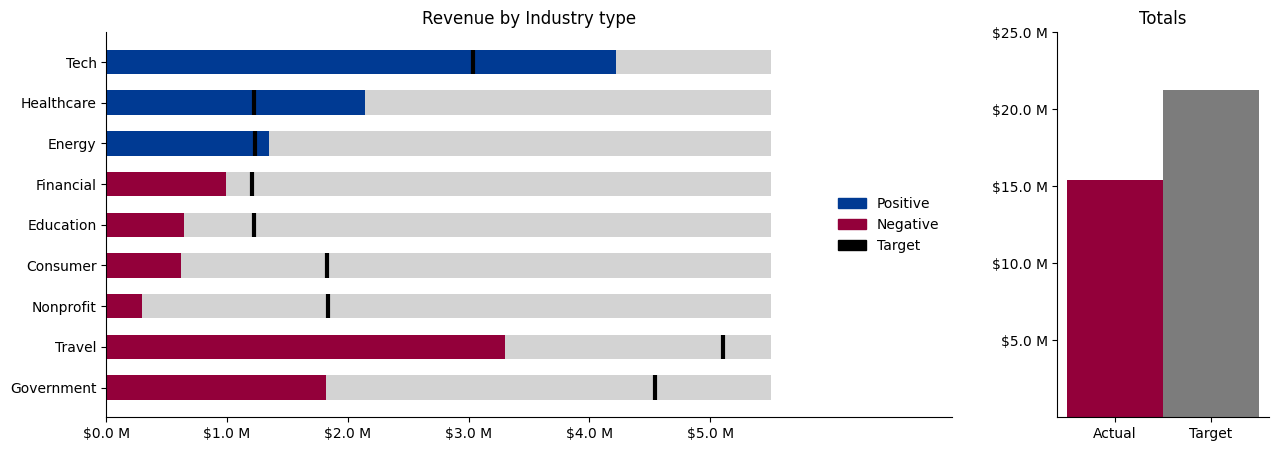

In [11]:
categorie = list(df_sort.columns[1:])
valori = list(df_sort.iloc[1,1:])
target = list(df_sort.iloc[0,1:])

fig, ax = plt.subplots(1,2,figsize=(15, 5),gridspec_kw={'width_ratios': [4, 1]})
ax[0].barh(categorie, 5.5, color="lightgray", height=0.6)
ax[0].barh(categorie[-3:], valori[-3:], color="#003a93", height=0.6)
ax[0].barh(categorie[:-3], valori[:-3],color="#93003a", height=0.6)

for i in range(len(categorie)):
    ax[0].vlines(target[i], ymin=i - 0.3, ymax=i + 0.3, color="black", linewidth=3)
    
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xticklabels(['$0.0 M','$1.0 M','$2.0 M','$3.0 M','$4.0 M','$5.0 M']) 
ax[0].set_title('Revenue by Industry type')
ax[0].set_xlim(0,7)
legend_handles = [
    mpatches.Patch(color="#003a93", label="Positive"),
    mpatches.Patch(color="#93003a", label="Negative"),
    mpatches.Patch(color="black", label="Target")
]
ax[0].legend(handles=legend_handles,loc = 'center right', frameon=False)

ax[1].bar(1-width/2,sum(df_sort.iloc[1,1:]),width, color='#93003a')
ax[1].bar(1+width/2,sum(df_sort.iloc[0,1:]),width, color='#7c7c7c')
ax[1].set_xticks([1-width/2,1+width/2])
ax[1].set_xticklabels(['Actual','Target'])
ax[1].set_yticks([5,10,15,20,25])
ax[1].set_yticklabels(['$5.0 M','$10.0 M','$15.0 M','$20.0 M','$25.0 M'])
ax[1].set_title('Totals')
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False) 

